In [1]:
#import libraries to jupyter notebook
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
#import boston housing data to jupyter notebook
housing_df = pd.read_csv('BostonHousing.csv')

In [3]:
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [4]:
# renaming the CAT. MEDV column to remove the space to avoid unnecessary error
housing_df = housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'})

# Handling Missing Data

In [5]:
# drop PTRATIO column
housing_df2 = housing_df.drop(columns=['PTRATIO'])

In [6]:
# Checking count of variables using describe
housing_df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,37.970000,50.000000,1.000000


In [7]:
# all variable counts are the same. double check missing value by using sum of is null
pd.DataFrame({'length' : len(housing_df2),
              'miss.val': housing_df2.isnull().sum(),
})

,length,miss.val
CRIM,506,0
ZN,506,0
INDUS,506,0
CHAS,506,0
NOX,506,0
RM,506,0
AGE,506,0
DIS,506,0
RAD,506,0
TAX,506,0


# Finding Outliers in PTRATIO

## Checking non-numeric values in PTRATIO

In [8]:
# converting PTRATIO to numeric, if there is a string it would return NaN
housing_df3 = housing_df.copy()
housing_df3['PTRATIO_numeric'] = pd.to_numeric(housing_df['PTRATIO'], errors = 'coerce')
non_numeric_values = housing_df3['PTRATIO_numeric'].isna().sum()

non_numeric_values

0

In [9]:
# double checking dtypes of PTRATIO. If there is a string the dtype would not be INT64 or float64
housing_df3.dtypes

CRIM               float64
ZN                 float64
INDUS              float64
CHAS                 int64
NOX                float64
RM                 float64
AGE                float64
DIS                float64
RAD                  int64
TAX                  int64
PTRATIO            float64
LSTAT              float64
MEDV               float64
CAT_MEDV             int64
PTRATIO_numeric    float64
dtype: object

## Shift in Decimal Place while Data Entry Error

Text(0.5, 1.0, '')

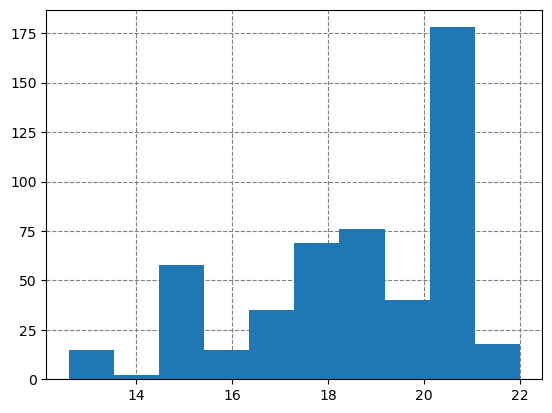

In [10]:
# use histogram to overview the data
fig, ax = plt.subplots()
ax.hist(housing_df.PTRATIO)
ax.set_axisbelow(True)
ax.grid(which='major', color='grey', linestyle='--')
plt.suptitle('')
plt.title('')

In [11]:
# double check using describe to see data distribution
#(mean, median, 25%, 50%, 75%, max) of PTRATIO to see if
#there's data with wrong decimal entry

housing_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

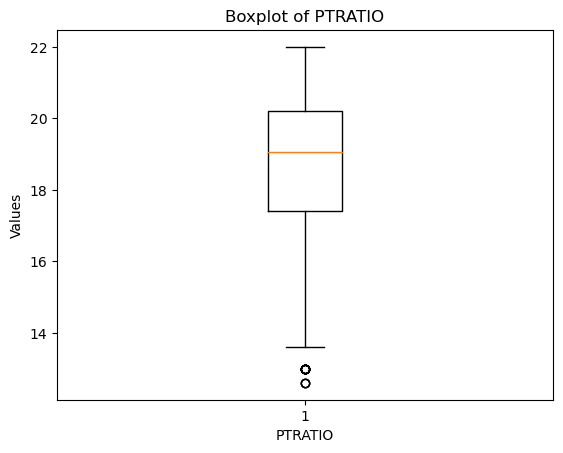

In [12]:
# Create a boxplot of the 'PTRATIO' column to see the outliers
plt.boxplot(housing_df['PTRATIO'])

plt.xlabel('PTRATIO')
plt.ylabel('Values')
plt.title('Boxplot of PTRATIO')

plt.show()

From the boxplot, descriptive statistics, and histogram analysis, it is evident that the data points falling below 14 represent outliers. Specifically, the 25th percentile (Q1) being around 17, while the maximum value reaches 22, indicates a notable deviation in the data, thus confirming the presence of outliers.

## Outliers in PTRATIO

In [13]:
housing_df['PTRATIO_Outlier'] = np.where(housing_df['PTRATIO'] < 14, 1, 0)
housing_df_outliers = housing_df[housing_df['PTRATIO_Outlier'] == 1]
housing_df_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,PTRATIO_Outlier
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,4.08,33.3,1,1
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,8.61,30.3,1,1
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,6.62,34.6,1,1
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,5.12,50.0,1,1
258,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,7.79,36.0,1,1
259,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,6.90,30.1,1,1
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,9.59,33.8,1,1
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,7.26,43.1,1,1
262,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,5.91,48.8,1,1
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,11.25,31.0,1,1


# Substitute missing data

## with Nan

In [14]:
# Although we did not find missing values in any column, we will
# substitute missing data with NaN to be safe

housing_df = housing_df.fillna(np.nan)

# with dropping the missing row

In [15]:
# We drop the data (omission) that has missing values
housing_df_omit = housing_df.dropna(axis=0)
housing_df_omit.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,PTRATIO_Outlier
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,0
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0,0


# with substituting the missing value using the mean of the data

In [16]:
housing_df_impute = housing_df.fillna(housing_df.mean())
housing_df_impute.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,PTRATIO_Outlier
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,0
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0,0


# Compute mean, median, min, max , SD for all variables

In [17]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,PTRATIO_Outlier
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008,0.031621
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456,0.175161
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000,1.000000


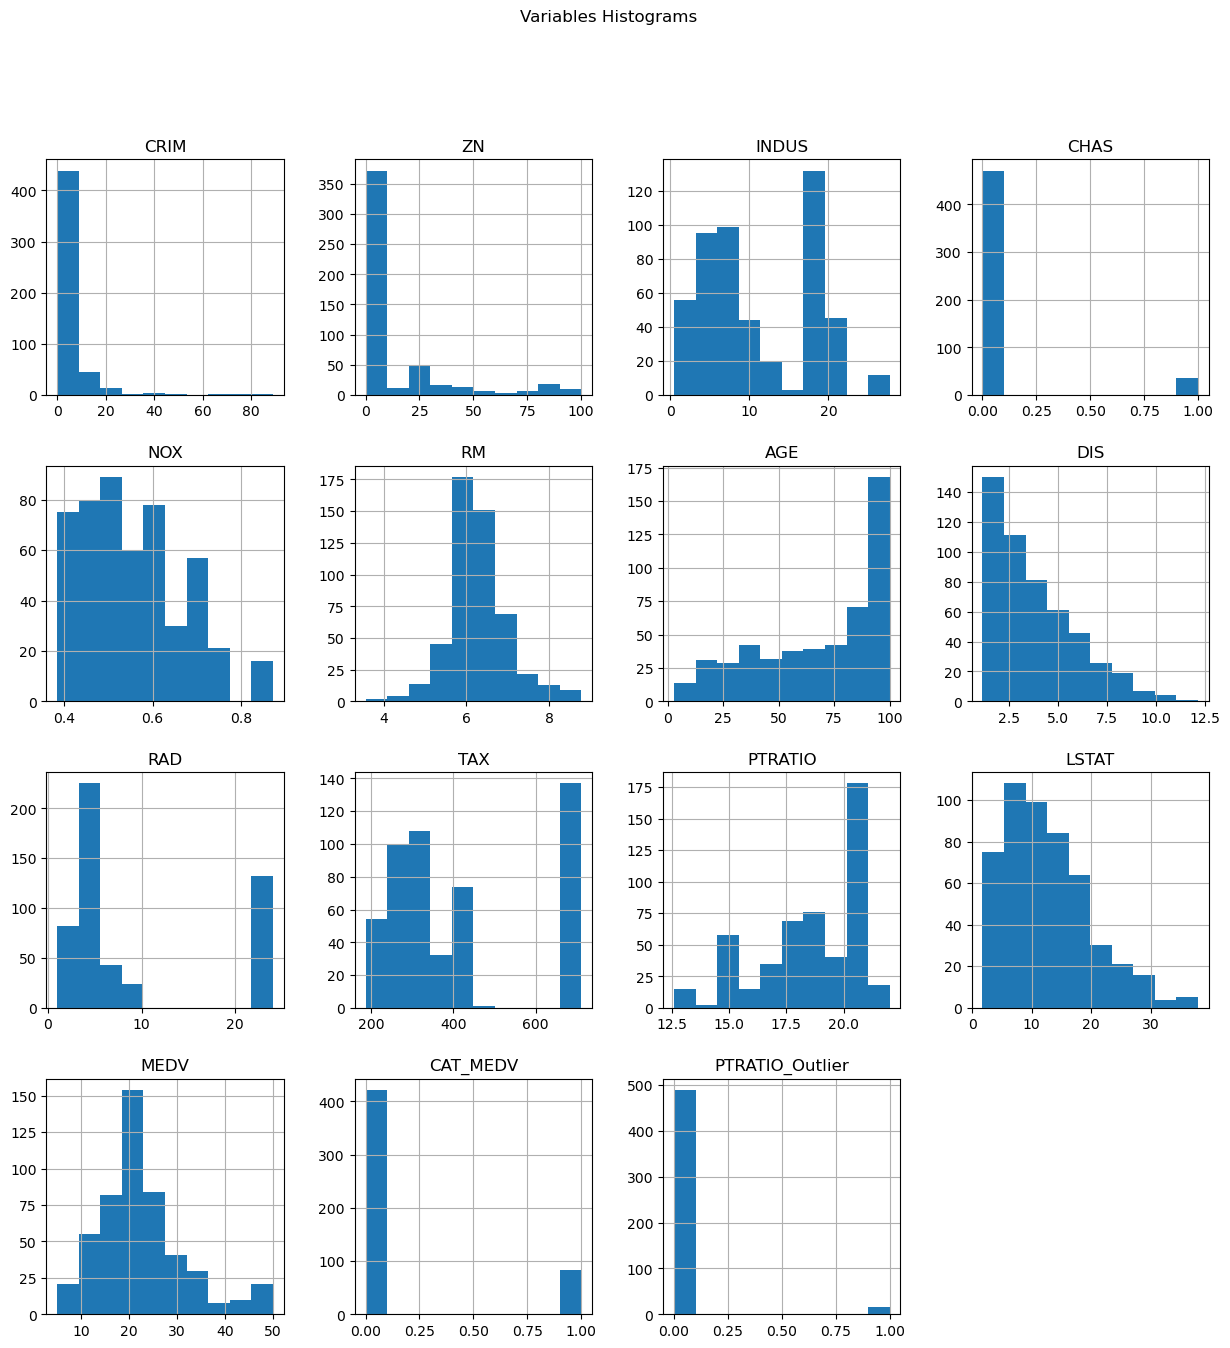

In [18]:
housing_df.hist(figsize=(15,15))
plt.suptitle("Variables Histograms")
plt.show()

In [19]:
# find variables with the largest variability
pd.DataFrame({'min'     : housing_df.min(),
              'max'     : housing_df.max(),
              'spread'  : housing_df.max() - housing_df.min()
})

,min,max,spread
CRIM,0.00632,88.9762,88.96988
ZN,0.00000,100.0000,100.00000
INDUS,0.46000,27.7400,27.28000
CHAS,0.00000,1.0000,1.00000
NOX,0.38500,0.8710,0.48600
RM,3.56100,8.7800,5.21900
AGE,2.90000,100.0000,97.10000
DIS,1.12960,12.1265,10.99690
RAD,1.00000,24.0000,23.00000
TAX,187.00000,711.0000,524.00000


From slight glance using histogram, we can see largest variability would be in tax column. This is confirmed after calculating the spread of the data, where we find the difference between the maximum and minimum value of the data.

From the spread, we can see highest spread is led by Tax, followed by ZN and Age

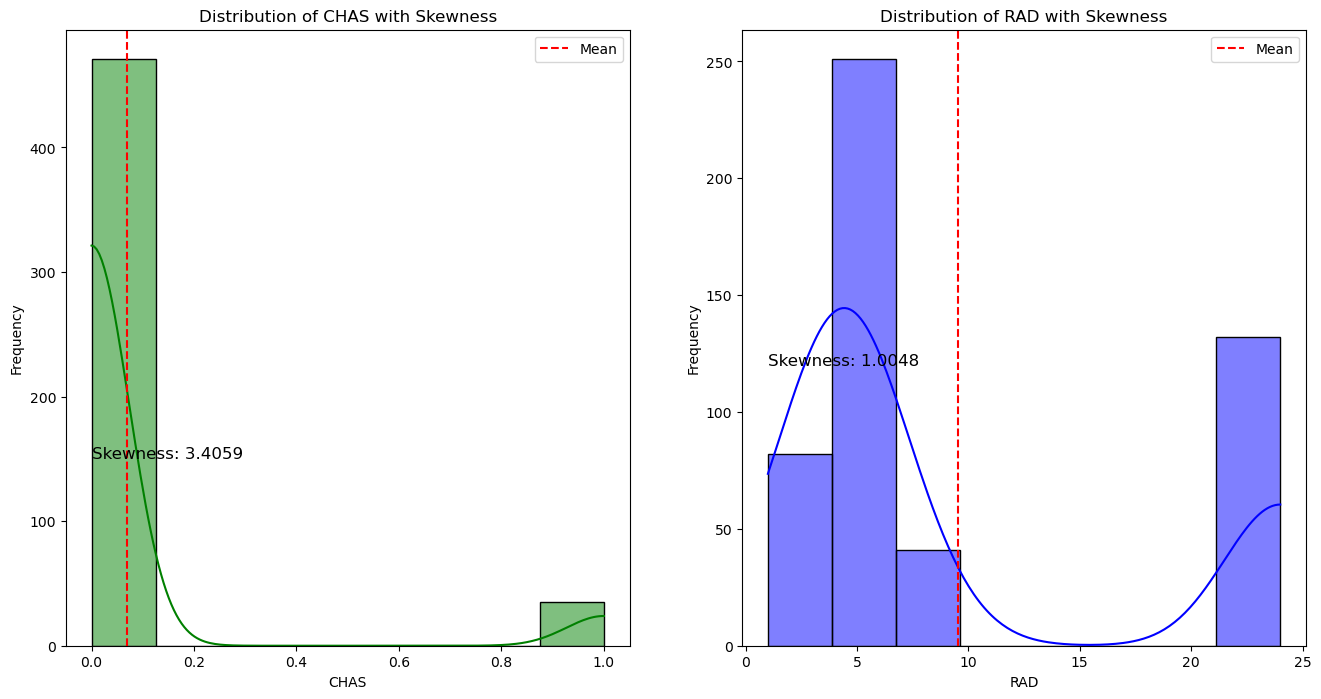

In [20]:
skewness_RAD = housing_df['RAD'].skew()
skewness_CHAS = housing_df['CHAS'].skew()

fig, axs = plt.subplots(ncols=2, figsize=(16, 8))

# Plot for CHAS column
sns.histplot(housing_df['CHAS'], kde=True, color='green', bins=8, ax=axs[0])
axs[0].axvline(housing_df['CHAS'].mean(), color='red', linestyle='--', label='Mean')
axs[0].text(x=housing_df['CHAS'].min(), y=150, s=f'Skewness: {skewness_CHAS:.4f}', fontsize=12)
axs[0].set_xlabel('CHAS')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of CHAS with Skewness')
axs[0].legend()

# Plot for RAD column
sns.histplot(housing_df['RAD'], kde=True, color='blue', bins=8, ax=axs[1])
axs[1].axvline(housing_df['RAD'].mean(), color='red', linestyle='--', label='Mean')
axs[1].text(x=housing_df['RAD'].min(), y=120, s=f'Skewness: {skewness_RAD:.4f}', fontsize=12)
axs[1].set_xlabel('RAD')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of RAD with Skewness')
axs[1].legend()

plt.show()

Using Skewness rule of thumb, where:

-0.5 < skewness < 0.5 : the distribution is approximately symmetric

-1 < skewness ≤ -0.5 or 0.5 ≤ skewness < 1 : the distribution is moderately skewed.

≤ -1 or skewness ≥ 1 : the distribution is highly skewed.

Variables that are right skewed are:
Highly Skewed:
CRIM, ZN, CHAS, DIS, RAD, MEDV, CAT_MEDV

Moderately Skewed:
NOX, TAX, LSTAT

Variables that are left skewed are:
Highly Skewed:
-

Moderately Skewed:
AGE, PTRATIO

Variables that are approximately symmetric:
INDUS, RM


# Comparing MEDV vs CHAS vs RAD
In this comparison, we would like to analyze if median house price is affected if the house's tract is bordered with the Charles River and Accessibility to Radial Highway

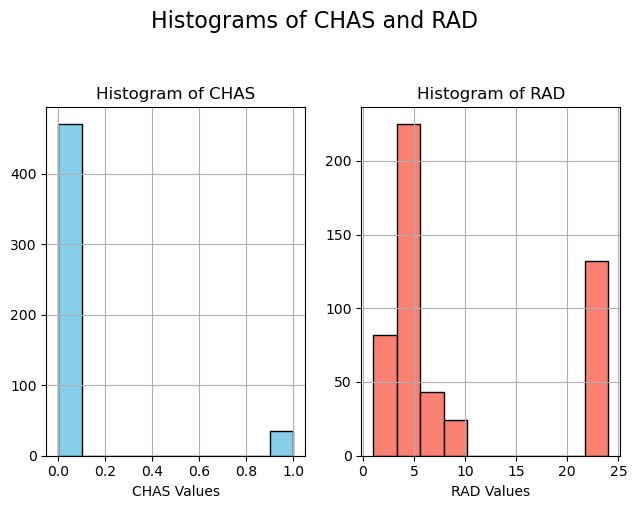

In [21]:
plt.subplot(1, 2, 1)
housing_df["CHAS"].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of CHAS')
plt.xlabel('CHAS Values')

plt.subplot(1, 2, 2)
housing_df["RAD"].hist(bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of RAD')
plt.xlabel('RAD Values')

plt.suptitle('Histograms of CHAS and RAD', x=0.5, y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

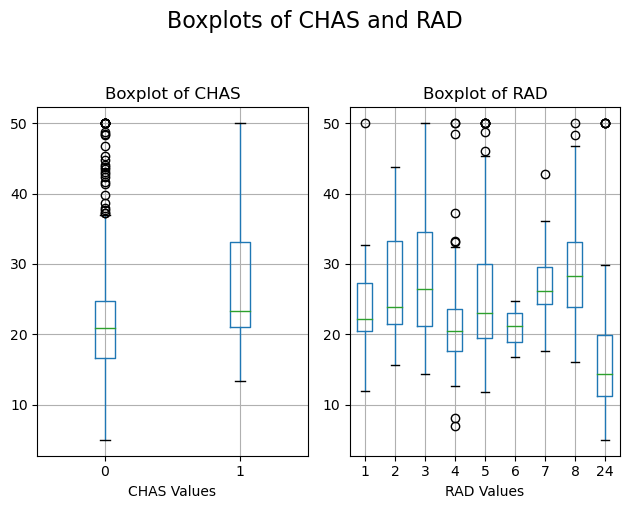

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
housing_df.boxplot(column = 'MEDV', by = 'CHAS', ax = axes[0])
housing_df.boxplot(column = 'MEDV', by = 'RAD', ax = axes[1])

axes[0].set_xlabel('CHAS Values')
axes[0].set_title('Boxplot of CHAS')
axes[1].set_xlabel('RAD Values')
axes[1].set_title('Boxplot of RAD')

plt.suptitle('Boxplots of CHAS and RAD', x=0.5, y=1.05, fontsize=16)
plt.tight_layout()

CHAS vs MEDV:

Comparing house prices based on their proximity to the river (CHAS), it appears that properties bordering the river generally command higher prices, with median prices also showing an uptrend. However, intriguingly, some houses not bordering the river (CHAS = 0) exhibit high prices that surpass the 75th percentile of house prices. This suggests the influence of other factors in the pricing dynamics

RAD vs MEDV:

When examining house prices relative to the RAD index (indicating proximity to radial highways), properties with an index of 3 show the widest spread house median values, ranging from $15,000 to $50,000. Moreover, there seems to be a trend where higher RAD indices correspond to more outliers. Notably, houses with a RAD index of 8 exhibit the highest median values compared to other indices

# Correlation between Variables

Text(0.5, 1.0, 'Correlation between each variable heatmap')

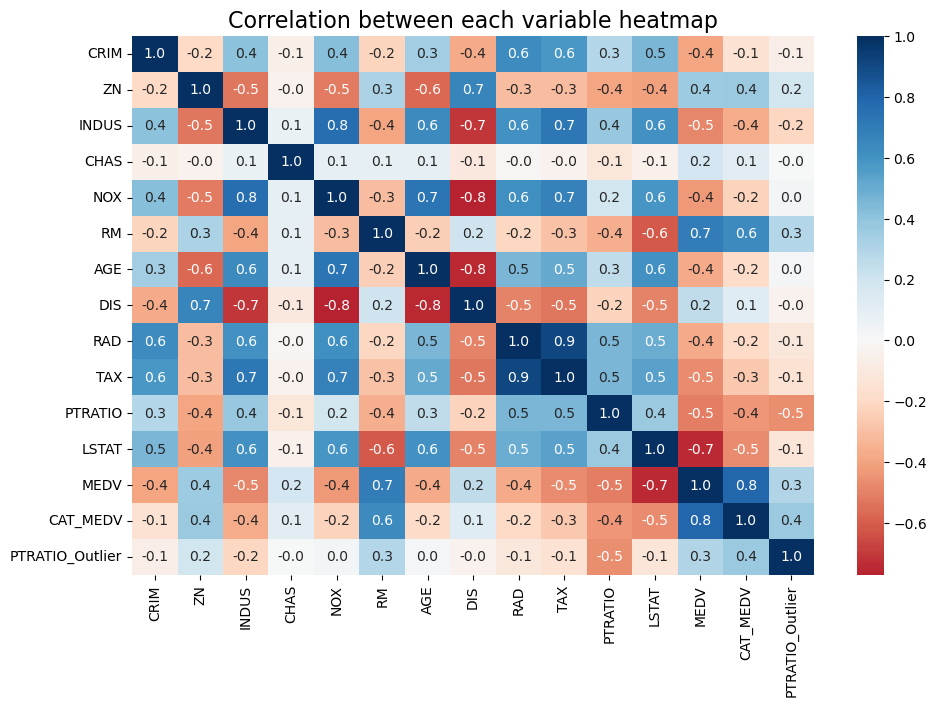

In [23]:
#Find the correlation between each pair of columns
corr = housing_df.corr().round(2)

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.title('Correlation between each variable heatmap', fontsize=16)

We observe a strong correlation of 0.9 between TAX and RAD, indicating that as the RAD index increases, so does the tax rate. To enhance the dataset's quality, we will remove the TAX and RAD columns.

Text(0.5, 1.0, 'Correlation between each variable heatmap')

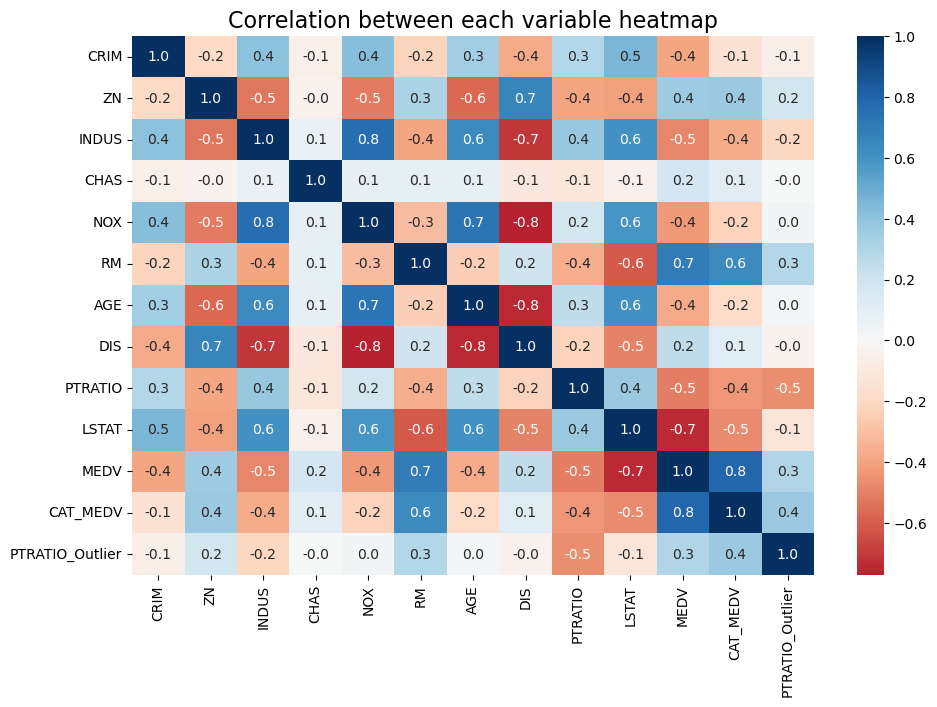

In [24]:
housing_df_droptaxrad = housing_df.drop(['TAX', 'RAD'], axis = 1)

corr2 = housing_df_droptaxrad.corr().round(2)

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr2, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.title('Correlation between each variable heatmap', fontsize=16)

After we removed Tax and Rad columns, we see there is no more correlations that is at 0.9, however we still see variables where they still highly correlated at 0.8.

We will try to normalize the data

In [25]:
scaler = StandardScaler()
norm_df = (housing_df - housing_df.mean()) / housing_df.std()
norm_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,PTRATIO_Outlier
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,-1.074499,0.159528,-0.445712,-0.180523
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,-0.491953,-0.101424,-0.445712,-0.180523
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,-1.207532,1.322937,2.239170,-0.180523
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,-1.360171,1.181589,2.239170,-0.180523
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,-1.025487,1.486032,2.239170,-0.180523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,-0.417734,-0.014440,-0.445712,-0.180523
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,-0.500355,-0.210154,-0.445712,-0.180523
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,-0.982076,0.148655,-0.445712,-0.180523
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,-0.864446,-0.057932,-0.445712,-0.180523


Text(0.5, 1.0, 'Correlation between each variable heatmap')

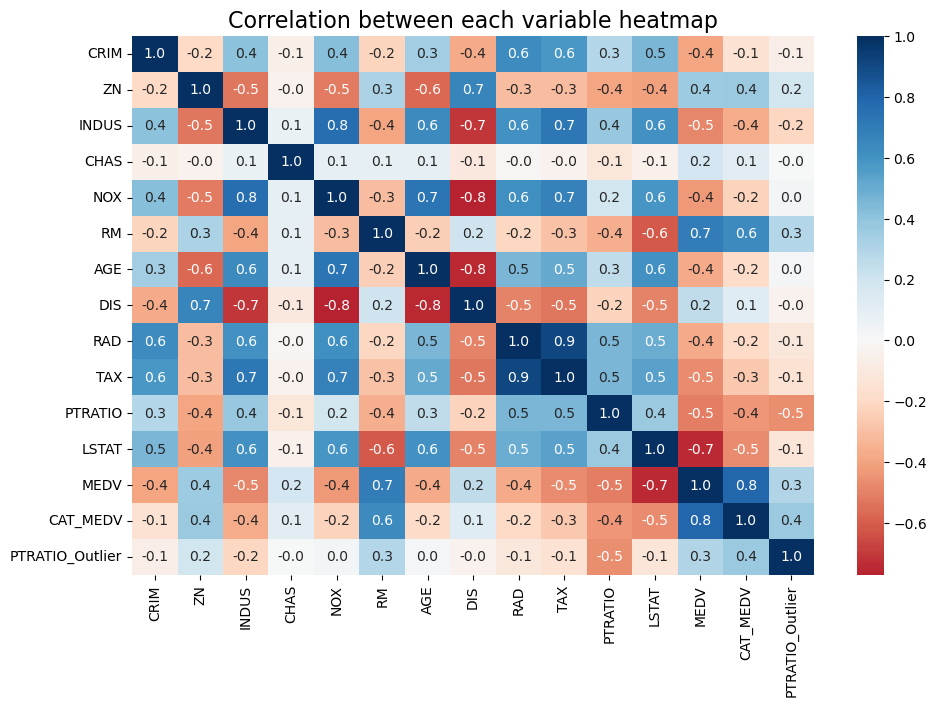

In [26]:
corr3 = norm_df.corr().round(2)

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr3, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.title('Correlation between each variable heatmap', fontsize=16)

Upon normalizing, we see that the correlation remains the same, hence normalizing is not needed.